In [0]:
from pyspark.sql import Row 
from pyspark.sql.types import *
import pandas as pdd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import os
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.rdd import portable_hash
from pyspark.statcounter import StatCounter
from pyspark.sql.types import StringType,IntegerType,FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import to_timestamp, current_timestamp, col,expr,unix_timestamp,round,when,hour
import os
import json
from datetime import datetime
from matplotlib import pyplot as plt
from pyspark.sql import functions as F
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
%matplotlib inline
spark = SparkSession.builder.getOrCreate()
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v2.4.5 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
#read dataSet 2012
df_2012 = spark.read.csv("/FileStore/tables/FAF4_5_1.csv",header=True, inferSchema=True)

#Filter the dataset to domestic freight goods and select the attributes I need to work on
df_2012_domistic=df_2012.where(col("trade_type")==1)
df_2012_domistic=df_2012_domistic.select("dms_orig","dms_dest","dms_mode","sctg2","wgt_dist","tons_2012","value_2012","tmiles_2012")

#Number of Null or nan values in each column
df_2012_domistic.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_2012_domistic.columns]).show()

print("Count of domestic , export and import freight in 2012 :",df_2012.count())
print("Count of domestic freight in 2012 :",df_2012_domistic.count())


+--------+--------+--------+-----+--------+---------+----------+-----------+
dms_orig|dms_dest|dms_mode|sctg2|wgt_dist|tons_2012|value_2012|tmiles_2012|
+--------+--------+--------+-----+--------+---------+----------+-----------+
 0| 0| 0| 0| 0| 0| 0| 0|
+--------+--------+--------+-----+--------+---------+----------+-----------+

Count of domestic , export and import freight in 2012 : 2905484
Count of domestic freight in 2012 : 430239

In [0]:
#read dataSet 2013
df_2013 = spark.read.csv("/FileStore/tables/FAF4_5_1_2013.csv",header=True, inferSchema=True)

#Filter the dataset to domestic freight goods , dropping the export and import attributes and rename the common attributes names to avoid duplicate columns after join
df_2013_domistic=df_2013.where(col("trade_type")==1)
df_2013_domistic=df_2013_domistic.drop("fr_orig","fr_dest","fr_inmode","fr_outmode","trade_type")
df_2013_domistic=df_2013_domistic.withColumnRenamed('dms_orig', 'dms_orig_13').withColumnRenamed('dms_dest', 'dms_dest_13').withColumnRenamed('dms_mode', 'dms_mode_13').withColumnRenamed('sctg2', 'sctg2_13').withColumnRenamed('wgt_dist', 'wgt_dist_13')

#Number of Null or nan values in each column
df_2013_domistic.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_2013_domistic.columns]).show()

print("Count of domestic , export and import freight in 2013 :",df_2013.count())
print("Count of domestic freight in 2013 :",df_2013_domistic.count())


+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
dms_orig_13|dms_dest_13|dms_mode_13|sctg2_13|tons_2013|value_2013|tmiles_2013|curval_2013|wgt_dist_13|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
 0| 0| 0| 0| 0| 0| 0| 0| 0|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+

Count of domestic , export and import freight in 2013 : 1740134
Count of domestic freight in 2013 : 430236

In [0]:
#read dataSet 2014
df_2014 = spark.read.csv("/FileStore/tables/FAF4_5_1_2014.csv",header=True, inferSchema=True)

#Filter the dataset to domestic freight goods , dropping the export and import attributes and rename the common attributes names to avoid duplicate columns after join
df_2014_domistic=df_2014.where(col("trade_type")==1)
df_2014_domistic=df_2014_domistic.drop("fr_orig","fr_dest","fr_inmode","fr_outmode","trade_type")
df_2014_domistic=df_2014_domistic.withColumnRenamed('dms_orig', 'dms_orig_14').withColumnRenamed('dms_dest', 'dms_dest_14').withColumnRenamed('dms_mode', 'dms_mode_14').withColumnRenamed('sctg2', 'sctg2_14').withColumnRenamed('wgt_dist', 'wgt_dist_14')

#Number of Null or nan values in each column
df_2014_domistic.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_2014_domistic.columns]).show()

print("Count of domestic , export and import freight in 2014 :",df_2014.count())
print("Count of domestic freight in 2014 :",df_2014_domistic.count())

+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
dms_orig_14|dms_dest_14|dms_mode_14|sctg2_14|tons_2014|value_2014|tmiles_2014|curval_2014|wgt_dist_14|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
 0| 0| 0| 0| 0| 0| 0| 0| 0|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+

Count of domestic , export and import freight in 2014 : 1771278
Count of domestic freight in 2014 : 430232

In [0]:
#read dataSet 2015
df_2015 = spark.read.csv("/FileStore/tables/FAF4_5_1_2015.csv",header=True, inferSchema=True)

#Filter the dataset to domestic freight goods , dropping the export and import attributes and rename the common attributes names to avoid duplicate columns after join
df_2015_domistic=df_2015.where(col("trade_type")==1)
df_2015_domistic=df_2015_domistic.drop("fr_orig","fr_dest","fr_inmode","fr_outmode","trade_type")
df_2015_domistic=df_2015_domistic.withColumnRenamed('dms_orig', 'dms_orig_15').withColumnRenamed('dms_dest', 'dms_dest_15').withColumnRenamed('dms_mode', 'dms_mode_15').withColumnRenamed('sctg2', 'sctg2_15').withColumnRenamed('wgt_dist', 'wgt_dist_15')

#Number of Null or nan values in each column
df_2015_domistic.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_2015_domistic.columns]).show()

print("Count of domestic , export and import freight in 2015 :",df_2015.count())
print("Count of domestic freight in 2015 :",df_2015_domistic.count())

+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
dms_orig_15|dms_dest_15|dms_mode_15|sctg2_15|tons_2015|value_2015|tmiles_2015|curval_2015|wgt_dist_15|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
 0| 0| 0| 0| 0| 0| 0| 0| 0|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+

Count of domestic , export and import freight in 2015 : 1784545
Count of domestic freight in 2015 : 430229

In [0]:
#read dataSet 2016
df_2016 = spark.read.csv("/FileStore/tables/FAF4_5_1_2016.csv",header=True, inferSchema=True)

#Filter the dataset to domestic freight goods , dropping the export and import attributes and rename the common attributes names to avoid duplicate columns after join
df_2016_domistic=df_2016.where(col("trade_type")==1)
df_2016_domistic=df_2016_domistic.drop("fr_orig","fr_dest","fr_inmode","fr_outmode","trade_type")
df_2016_domistic=df_2016_domistic.withColumnRenamed('dms_orig', 'dms_orig_16').withColumnRenamed('dms_dest', 'dms_dest_16').withColumnRenamed('dms_mode', 'dms_mode_16').withColumnRenamed('sctg2', 'sctg2_16').withColumnRenamed('wgt_dist', 'wgt_dist_16')

#Number of Null or nan values in each column
df_2016_domistic.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_2016_domistic.columns]).show()

print("Count of domestic , export and import freight in 2016 :",df_2016.count())
print("Count of domestic freight in 2016 :",df_2016_domistic.count())

+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
dms_orig_16|dms_dest_16|dms_mode_16|sctg2_16|tons_2016|value_2016|tmiles_2016|curval_2016|wgt_dist_16|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
 0| 0| 0| 0| 0| 0| 0| 0| 0|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+

Count of domestic , export and import freight in 2016 : 1784368
Count of domestic freight in 2016 : 430228

In [0]:
#read dataSet 2017
df_2017 = spark.read.csv("/FileStore/tables/FAF4_5_1_2017.csv",header=True, inferSchema=True)

#Filter the dataset to domestic freight goods , dropping the export and import attributes and rename the common attributes names to avoid duplicate columns after join
df_2017_domistic=df_2017.where(col("trade_type")==1)
df_2017_domistic=df_2017_domistic.drop("fr_orig","fr_dest","fr_inmode","fr_outmode","trade_type")
df_2017_domistic=df_2017_domistic.withColumnRenamed('dms_orig', 'dms_orig_17').withColumnRenamed('dms_dest', 'dms_dest_17').withColumnRenamed('dms_mode', 'dms_mode_17').withColumnRenamed('sctg2', 'sctg2_17').withColumnRenamed('wgt_dist', 'wgt_dist_17')

#Number of Null or nan values in each column
df_2017_domistic.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_2017_domistic.columns]).show()

print("Count of domestic , export and import freight in 2017 :",df_2017.count())
print("Count of domestic freight in 2017 :",df_2017_domistic.count())

+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
dms_orig_17|dms_dest_17|dms_mode_17|sctg2_17|tons_2017|value_2017|tmiles_2017|curval_2017|wgt_dist_17|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
 0| 0| 0| 0| 0| 0| 0| 0| 0|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+

Count of domestic , export and import freight in 2017 : 1816893
Count of domestic freight in 2017 : 430228

In [0]:
#read dataSet 2018
df_2018 = spark.read.csv("/FileStore/tables/FAF4_5_1_2018.csv",header=True, inferSchema=True)

#Filter the dataset to domestic freight goods , dropping the export and import attributes and rename the common attributes names to avoid duplicate columns after join
df_2018_domistic=df_2018.where(col("trade_type")==1)
df_2018_domistic=df_2018_domistic.drop("fr_orig","fr_dest","fr_inmode","fr_outmode","trade_type")
df_2018_domistic=df_2018_domistic.withColumnRenamed('dms_orig', 'dms_orig_18').withColumnRenamed('dms_dest', 'dms_dest_18').withColumnRenamed('dms_mode', 'dms_mode_18').withColumnRenamed('sctg2', 'sctg2_18').withColumnRenamed('wgt_dist', 'wgt_dist_18')

#Number of Null or nan values in each column
df_2018_domistic.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_2018_domistic.columns]).show()

print("Count of domestic , export and import freight in 2018 :",df_2018.count())
print("Count of domestic freight in 2018 :",df_2018_domistic.count())

+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
dms_orig_18|dms_dest_18|dms_mode_18|sctg2_18|tons_2018|value_2018|tmiles_2018|curval_2018|wgt_dist_18|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+
 0| 0| 0| 0| 0| 0| 0| 0| 0|
+-----------+-----------+-----------+--------+---------+----------+-----------+-----------+-----------+

Count of domestic , export and import freight in 2018 : 1838349
Count of domestic freight in 2018 : 430234

In [0]:
#Inner join between six dataSets with conditions of origin , destination , mode of transportation , commodity type and the distance

cond_13=[df_2012_domistic.dms_orig == df_2013_domistic.dms_orig_13,df_2012_domistic.dms_dest == df_2013_domistic.dms_dest_13,df_2012_domistic.dms_mode == df_2013_domistic.dms_mode_13,df_2012_domistic.sctg2 == df_2013_domistic.sctg2_13,df_2012_domistic.wgt_dist == df_2013_domistic.wgt_dist_13]

df_12_13 =df_2012_domistic.join(df_2013_domistic,cond_13 ).drop("dms_orig_13","dms_dest_13","dms_mode_13","sctg2_13","wgt_dist_13")


cond_14=[df_12_13.dms_orig == df_2014_domistic.dms_orig_14,df_12_13.dms_dest == df_2014_domistic.dms_dest_14,df_12_13.dms_mode == df_2014_domistic.dms_mode_14,df_12_13.sctg2 == df_2014_domistic.sctg2_14,df_12_13.wgt_dist == df_2014_domistic.wgt_dist_14]

df_13_14 =df_12_13.join(df_2014_domistic,cond_14 ).drop("dms_orig_14","dms_dest_14","dms_mode_14","sctg2_14","wgt_dist_14")


cond_15=[df_13_14.dms_orig == df_2015_domistic.dms_orig_15,df_13_14.dms_dest == df_2015_domistic.dms_dest_15,df_13_14.dms_mode == df_2015_domistic.dms_mode_15,df_13_14.sctg2 == df_2015_domistic.sctg2_15,df_13_14.wgt_dist == df_2015_domistic.wgt_dist_15]

df_13_14_15 =df_13_14.join(df_2015_domistic,cond_15 ).drop("dms_orig_15","dms_dest_15","dms_mode_15","sctg2_15","wgt_dist_15")


cond_16=[df_13_14_15.dms_orig == df_2016_domistic.dms_orig_16,df_13_14_15.dms_dest == df_2016_domistic.dms_dest_16,df_13_14_15.dms_mode == df_2016_domistic.dms_mode_16,df_13_14_15.sctg2 == df_2016_domistic.sctg2_16,df_13_14_15.wgt_dist == df_2016_domistic.wgt_dist_16]

df_13_14_15_16 =df_13_14_15.join(df_2016_domistic,cond_16 ).drop("dms_orig_16","dms_dest_16","dms_mode_16","sctg2_16","wgt_dist_16")


cond_17=[df_13_14_15_16.dms_orig == df_2017_domistic.dms_orig_17,df_13_14_15_16.dms_dest == df_2017_domistic.dms_dest_17,df_13_14_15_16.dms_mode == df_2017_domistic.dms_mode_17,df_13_14_15_16.sctg2 == df_2017_domistic.sctg2_17,df_13_14_15_16.wgt_dist == df_2017_domistic.wgt_dist_17]

df_13_14_15_16_17 =df_13_14_15_16.join(df_2017_domistic,cond_17 ).drop("dms_orig_17","dms_dest_17","dms_mode_17","sctg2_17","wgt_dist_17")


cond_18=[df_13_14_15_16_17.dms_orig == df_2018_domistic.dms_orig_18,df_13_14_15_16_17.dms_dest == df_2018_domistic.dms_dest_18,df_13_14_15_16_17.dms_mode == df_2018_domistic.dms_mode_18,df_13_14_15_16_17.sctg2 == df_2018_domistic.sctg2_18,df_13_14_15_16_17.wgt_dist == df_2018_domistic.wgt_dist_18]

df_13_14_15_16_17_18 =df_13_14_15_16_17.join(df_2018_domistic,cond_18 ).drop("dms_orig_18","dms_dest_18","dms_mode_18","sctg2_18","wgt_dist_18")

In [0]:
df_13_14_15_16_17_18.printSchema()


root
-- dms_orig: integer (nullable = true)
-- dms_dest: integer (nullable = true)
-- dms_mode: integer (nullable = true)
-- sctg2: integer (nullable = true)
-- wgt_dist: double (nullable = true)
-- tons_2012: double (nullable = true)
-- value_2012: double (nullable = true)
-- tmiles_2012: double (nullable = true)
-- tons_2013: double (nullable = true)
-- value_2013: double (nullable = true)
-- tmiles_2013: double (nullable = true)
-- curval_2013: double (nullable = true)
-- tons_2014: double (nullable = true)
-- value_2014: double (nullable = true)
-- tmiles_2014: double (nullable = true)
-- curval_2014: double (nullable = true)
-- tons_2015: double (nullable = true)
-- value_2015: double (nullable = true)
-- tmiles_2015: double (nullable = true)
-- curval_2015: double (nullable = true)
-- tons_2016: double (nullable = true)
-- value_2016: double (nullable = true)
-- tmiles_2016: double (nullable = true)
-- curval_2016: double (nullable = true)
-- tons_2017: double (nullable = true)
-- value_2017: double (nullable = true)
-- tmiles_2017: double (nullable = true)
-- curval_2017: double (nullable = true)
-- tons_2018: double (nullable = true)
-- value_2018: double (nullable = true)
-- tmiles_2018: double (nullable = true)
-- curval_2018: double (nullable = true)

In [0]:
#calculation of the growth rate for each commodity in each region-to-region from 2013 to 2018
df_with_growth_rate=df_13_14_15_16_17_18.withColumn("tons_GrowthRate_12_13",((col("tons_2013") - col("tons_2012")) / (col("tons_2012"))) * 100 )
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_13_14",((col("tons_2014") - col("tons_2013")) / (col("tons_2013"))) * 100 )
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_14_15",((col("tons_2015") - col("tons_2014")) / (col("tons_2014"))) * 100 )
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_15_16",((col("tons_2016") - col("tons_2015")) / (col("tons_2015"))) * 100 )
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_16_17",((col("tons_2017") - col("tons_2016")) / (col("tons_2016"))) * 100 )
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_17_18",((col("tons_2018") - col("tons_2017")) / (col("tons_2017"))) * 100 )

#Number of Null or nan values in each column
df_with_growth_rate.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_with_growth_rate.columns]).show()

+--------+--------+--------+-----+--------+---------+----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
dms_orig|dms_dest|dms_mode|sctg2|wgt_dist|tons_2012|value_2012|tmiles_2012|tons_2013|value_2013|tmiles_2013|curval_2013|tons_2014|value_2014|tmiles_2014|curval_2014|tons_2015|value_2015|tmiles_2015|curval_2015|tons_2016|value_2016|tmiles_2016|curval_2016|tons_2017|value_2017|tmiles_2017|curval_2017|tons_2018|value_2018|tmiles_2018|curval_2018|tons_GrowthRate_12_13|tons_GrowthRate_13_14|tons_GrowthRate_14_15|tons_GrowthRate_15_16|tons_GrowthRate_16_17|tons_GrowthRate_17_18|
+--------+--------+--------+-----+--------+---------+----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 91| 91| 91| 91| 91|
+--------+--------+--------+-----+--------+---------+----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+

In [0]:
#There are null values in df_with_growth_rate dataFrame as aresult of some tons attributes equal zero and it will get removed
dff_null=df_with_growth_rate.select(col("tons_2013"),col("tons_2014"),col("tons_2015"),col("tons_2016"),col("tons_2017"),col("tons_2018"),col("tons_GrowthRate_13_14")).where(F.isnull(F.col("tons_GrowthRate_13_14")))
dff_null.show()
print("-------------------------------------------")
print("Nummber of null values :",dff_null.count())

+---------+---------+---------+---------+---------+---------+---------------------+
tons_2013|tons_2014|tons_2015|tons_2016|tons_2017|tons_2018|tons_GrowthRate_13_14|
+---------+---------+---------+---------+---------+---------+---------------------+
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| null|
+---------+---------+---------+---------+---------+---------+---------------------+
only showing top 20 rows

-------------------------------------------
Nummber of null values : 91

In [0]:
#Removing Null values 
df_with_growth_rate=df_with_growth_rate.where(col("tons_GrowthRate_13_14").isNotNull())

#Number of Null or nan values in each column
df_with_growth_rate.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_with_growth_rate.columns]).show()


+--------+--------+--------+-----+--------+---------+----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
dms_orig|dms_dest|dms_mode|sctg2|wgt_dist|tons_2012|value_2012|tmiles_2012|tons_2013|value_2013|tmiles_2013|curval_2013|tons_2014|value_2014|tmiles_2014|curval_2014|tons_2015|value_2015|tmiles_2015|curval_2015|tons_2016|value_2016|tmiles_2016|curval_2016|tons_2017|value_2017|tmiles_2017|curval_2017|tons_2018|value_2018|tmiles_2018|curval_2018|tons_GrowthRate_12_13|tons_GrowthRate_13_14|tons_GrowthRate_14_15|tons_GrowthRate_15_16|tons_GrowthRate_16_17|tons_GrowthRate_17_18|
+--------+--------+--------+-----+--------+---------+----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+--------+--------+--------+-----+--------+---------+----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------+----------+-----------+-----------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+

In [0]:
df_with_growth_rate.columns

Out[31]: ['dms_orig',
 'dms_dest',
 'dms_mode',
 'sctg2',
 'wgt_dist',
 'tons_2012',
 'value_2012',
 'tmiles_2012',
 'tons_2013',
 'value_2013',
 'tmiles_2013',
 'curval_2013',
 'tons_2014',
 'value_2014',
 'tmiles_2014',
 'curval_2014',
 'tons_2015',
 'value_2015',
 'tmiles_2015',
 'curval_2015',
 'tons_2016',
 'value_2016',
 'tmiles_2016',
 'curval_2016',
 'tons_2017',
 'value_2017',
 'tmiles_2017',
 'curval_2017',
 'tons_2018',
 'value_2018',
 'tmiles_2018',
 'curval_2018',
 'tons_GrowthRate_12_13',
 'tons_GrowthRate_13_14',
 'tons_GrowthRate_14_15',
 'tons_GrowthRate_15_16',
 'tons_GrowthRate_16_17',
 'tons_GrowthRate_17_18']

In [0]:
#calculation of the average for the growth rate from 2013 to 2018
df_with_growth_rate=df_with_growth_rate.withColumn("Avg_tons_GrowthRate_12_18",((col("tons_GrowthRate_12_13") + col("tons_GrowthRate_13_14") + col("tons_GrowthRate_14_15") + col("tons_GrowthRate_15_16") + col("tons_GrowthRate_16_17") + col("tons_GrowthRate_17_18")) /6))

In [0]:
df_with_growth_rate.select("Avg_tons_GrowthRate_12_18").show()
print("-----------------------------------------------------")

row1 = df_with_growth_rate.agg({"Avg_tons_GrowthRate_12_18": "max" }).collect()[0][0]
row2 = df_with_growth_rate.agg({ "Avg_tons_GrowthRate_12_18": "min"}).collect()[0][0]

print("Max of Avg_tons_GrowthRate_12_18 : ",row1)
print("-----------------------------------------------------")
print("Min of Avg_tons_GrowthRate_12_18 : ",row2)

+-------------------------+
Avg_tons_GrowthRate_12_18|
+-------------------------+
 2.4978925281174256|
 -0.8088211828421036|
 1.6406605009640216|
 1.6373505323382476|
 2.499832129621906|
 1.5688143657916018|
 0.10426031146142267|
 0.0|
 0.11862807605812908|
 2.5068449280740417|
 2.4979142137625114|
 -0.4385718570088282|
 -0.3873299473156742|
 0.8823413258853542|
 1.4910222991614388|
 -0.8145790387013937|
 -0.9707129339154913|
 1.6380146183135367|
 -1.4154170070765684|
 1.6666666666666676|
+-------------------------+
only showing top 20 rows

-----------------------------------------------------
Max of Avg_tons_GrowthRate_12_18 : 33.333333333333336
-----------------------------------------------------
Min of Avg_tons_GrowthRate_12_18 : -45.345721869410426

In [0]:
#This is the growth rate for goods tons from 2013 to each year until 2018 for each commodities in specific region-to-region and after 2018 I used the avaerage of growth rate from 2012 to 2018 and added it for each year as a year growth rate to 2025
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_14", col("tons_GrowthRate_12_13") + col("tons_GrowthRate_13_14"))
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_15", col("tons_GrowthRate_12_14") + col("tons_GrowthRate_14_15"))
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_16", col("tons_GrowthRate_12_15") + col("tons_GrowthRate_15_16"))
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_17", col("tons_GrowthRate_12_16") + col("tons_GrowthRate_16_17"))
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_18", col("tons_GrowthRate_12_17") + col("tons_GrowthRate_17_18"))
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_19", col("tons_GrowthRate_12_18") + col("Avg_tons_GrowthRate_12_18"))
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_20", col("tons_GrowthRate_12_19") + col("Avg_tons_GrowthRate_12_18"))
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_21", col("tons_GrowthRate_12_20") + col("Avg_tons_GrowthRate_12_18"))
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_22", col("tons_GrowthRate_12_21") + col("Avg_tons_GrowthRate_12_18"))
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_23", col("tons_GrowthRate_12_22") + col("Avg_tons_GrowthRate_12_18"))
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_24", col("tons_GrowthRate_12_23") + col("Avg_tons_GrowthRate_12_18"))
df_with_growth_rate=df_with_growth_rate.withColumn("tons_GrowthRate_12_25", col("tons_GrowthRate_12_24") + col("Avg_tons_GrowthRate_12_18"))

In [0]:
df_with_growth_rate.select("tons_GrowthRate_12_13","tons_GrowthRate_12_14","tons_GrowthRate_12_15","tons_GrowthRate_12_16","tons_GrowthRate_12_17","tons_GrowthRate_12_18","tons_GrowthRate_12_19","tons_GrowthRate_12_20","tons_GrowthRate_12_21","tons_GrowthRate_12_22","tons_GrowthRate_12_23","tons_GrowthRate_12_24","tons_GrowthRate_12_25").show()

+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
tons_GrowthRate_12_13|tons_GrowthRate_12_14|tons_GrowthRate_12_15|tons_GrowthRate_12_16|tons_GrowthRate_12_17|tons_GrowthRate_12_18|tons_GrowthRate_12_19|tons_GrowthRate_12_20|tons_GrowthRate_12_21|tons_GrowthRate_12_22|tons_GrowthRate_12_23|tons_GrowthRate_12_24|tons_GrowthRate_12_25|
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
 2.8879127107836093| 3.5972009434852383| 3.9076367844655095| 9.649286409550715| 9.345656386923507| 14.987355168704553| 17.48524769682198| 19.983140224939405| 22.48103275305683| 24.978925281174256| 27.47681780929168| 29.974710337409107| 32.47260286552653|
 0.961538461538467| 2.5488400488400558| -2.763659951159945| -6.394022987463576| -6.394022987463576| -4.852927097052621| -5.6617482798947245| -6.470569462736828| -7.279390645578931| -8.088211828421034| -8.897033011263138| -9.705854194105243| -10.514675376947347|
 3.5603277762079686| 4.488022182756404| 3.001133834554186| 5.608159081535527| 7.346591817561204| 9.84396300578413| 11.48462350674815| 13.125284007712171| 14.765944508676192| 16.406605009640213| 18.047265510604234| 19.687926011568255| 21.328586512532276|
 3.553299492385801| 4.472417139444625| 3.015222239626766| 5.603022609312539| 7.344764351054272| 9.824103194029485| 11.461453726367733| 13.09880425870598| 14.736154791044228| 16.373505323382474| 18.01085585572072| 19.648206388058966| 21.285556920397212|
 2.900631820792647| 3.5983711453809812| 3.903249194161466| 9.650693239477848| 9.337131703026325| 14.998992777731438| 17.498824907353345| 19.998657036975253| 22.49848916659716| 24.998321296219068| 27.498153425840975| 29.997985555462883| 32.49781768508479|
 12.760000000000002| 7.929259615871886| 8.396518232200643| 8.934480336347992| 8.9357982761445| 9.41288619474961| 10.981700560541212| 12.550514926332813| 14.119329292124414| 15.688143657916015| 17.256958023707618| 18.82577238949922| 20.394586755290824|
 1.8618618618618565| 2.097710918465637| -1.255230258004957| -3.5680726195387353| -1.7612190369842269| 0.625561868768536| 0.7298221802299587| 0.8340824916913814| 0.938342803152804| 1.0426031146142267| 1.1468634260756494| 1.251123737537072| 1.3553840489984947|
 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0| 0.0|
 1.8309859154929713| 2.107611088383693| -1.2027337392025133| -3.627840729216769| -1.727255933895138| 0.7117684563487745| 0.8303965324069036| 0.9490246084650327| 1.0676526845231618| 1.1862807605812908| 1.30490883663942| 1.423536912697549| 1.542164988755678|
 2.8248587570621493| 3.649034581237978| 3.9215141452706646| 9.628035884401093| 9.370966475660744| 15.04106956844425| 17.547914496518292| 20.054759424592334| 22.561604352666375| 25.068449280740417| 27.57529420881446| 30.0821391368885| 32.588984064962546|
 2.8878726287262815| 3.596984489784819| 3.907973729802296| 9.649345173272629| 9.34536570055565| 14.987485282575069| 17.48539949633758| 19.98331371010009| 22.481227923862605| 24.979142137625118| 27.47705635138763| 29.974970565150144| 32.47288477891266|
 -2.6917057902973385| -0.6974954332693608| -1.3912828820236907| -1.232502316764878| -1.6129715621675522| -2.6314311420529695| -3.070002999061798| -3.5085748560706262| -3.9471467130794546| -4.385718570088283| -4.824290427097111| -5.262862284105939| -5.701434141114767|
 -0.5142098860997505| -3.304183764830357| -6.217110412820755| -4.312096132574612| -2.1768750981914833| -2.3239796838940454| -2.7113096312097196| -3.0986395785253937| -3.485969525841068| -3.873299473156742| -4.260629420472417| -4.647959367788091| -5.0

In [0]:
#Extract the tables with columns I need to use for training and create regression model with creating year column
from pyspark.sql.functions import lit
df_ton_2013=df_with_growth_rate.select("dms_orig","dms_dest","dms_mode","sctg2","wgt_dist",col("tons_GrowthRate_12_13").alias("tons_GrowthRate"),col("tons_2013").alias("tons")).withColumn("year", lit(2013))
df_ton_2014=df_with_growth_rate.select("dms_orig","dms_dest","dms_mode","sctg2","wgt_dist",col("tons_GrowthRate_12_14").alias("tons_GrowthRate"),col("tons_2014").alias("tons")).withColumn("year", lit(2014))
df_ton_2015=df_with_growth_rate.select("dms_orig","dms_dest","dms_mode","sctg2","wgt_dist",col("tons_GrowthRate_12_15").alias("tons_GrowthRate"),col("tons_2015").alias("tons")).withColumn("year", lit(2015))
df_ton_2016=df_with_growth_rate.select("dms_orig","dms_dest","dms_mode","sctg2","wgt_dist",col("tons_GrowthRate_12_16").alias("tons_GrowthRate"),col("tons_2016").alias("tons")).withColumn("year", lit(2016))
df_ton_2017=df_with_growth_rate.select("dms_orig","dms_dest","dms_mode","sctg2","wgt_dist",col("tons_GrowthRate_12_17").alias("tons_GrowthRate"),col("tons_2017").alias("tons")).withColumn("year", lit(2017))
df_ton_2018=df_with_growth_rate.select("dms_orig","dms_dest","dms_mode","sctg2","wgt_dist",col("tons_GrowthRate_12_18").alias("tons_GrowthRate"),col("tons_2018").alias("tons")).withColumn("year", lit(2018))

In [0]:
#Union the datasets in one data
df_tons = df_ton_2013.union(df_ton_2014)
df_tons = df_tons.union(df_ton_2015)
df_tons = df_tons.union(df_ton_2016)
df_tons = df_tons.union(df_ton_2017)
df_tons = df_tons.union(df_ton_2018)

#This is the dataset I will train the model on
print("Count for the df_tons : ",df_tons.count())

Count for the df_tons : 2519178

In [0]:
#Dictionary for Domestic region origin

dict_1 = {11 :"Birmingham-Hoover-Talladega, AL CFS Area" , 12 : "Mobile-Daphne-Fairhope, AL CFS Area" , 19 : "Remainder of Alabama" , 20 : "Alaska" , 41 : "Phoenix-Mesa-Glendale, AZ CFS Area" , 42 : "Tucson-Nogales, AZ CFS Area" , 49 : "Remainder of Arizona" , 50 : "Remainder of Arkansas" , 61 : "Los Angeles-Long Beach, CA CFS Area" , 62 : "Sacramento-Roseville, CA CFS Area" , 63 : "San Diego-Carlsbad-San Marcos, CA CFS Area" , 64 : "San Jose-San Francisco-Oakland, CA CFS Area" , 65 : "Fresno-Madera, CA CFS Area" , 69 : "Remainder of California" , 81 : "Denver-Aurora, CO CFS Area" , 89 : "Remainder of Colorado" , 91 : "Hartford-West Hartford-East Hartford, CT CFS Area" , 92 : "New York-Newark, NY-NJ-CT-PA CFS Area (CT Part)" , 99 : "Remainder of Connecticut" , 101 : "Philadelphia-Reading-Camden, PA-NJ-DE-MD CFS Area (DE Part)" , 109 : "Remainder of Delaware" , 111 : "Washington-Arlington-Alexandria, DC-VA-MD-WV CFS Area (DC Part)" , 121 : "Jacksonville-St. Marys-Palatka, FL-GA CFS Area (FL Part)" , 122 : "Miami-Fort Lauderdale-Port St. Lucie, FL CFS Area" , 123 : "Orlando-Deltona-Daytona Beach, FL CFS Area" , 124 : "Tampa-St. Petersburg-Clearwater, FL CFS Area" , 129 : "Remainder of Florida" , 131 : "Atlanta-Athens-Clarke County-Sandy Springs, GA CFS Area" , 132 : "Savannah-Hinesville-Statesboro, GA CFS Area" , 139 : "Remainder of Georgia" , 151 : "Urban Honolulu, HI CFS Area" , 159 : "Remainder of Hawaii" , 160 : "Idaho" , 171 : "Chicago-Naperville, IL-IN-WI CFS Area (IL Part)" , 172 : "St. Louis-St. Charles-Farmington, MO-IL CFS Area(IL Part)" , 179 : "Remainder of Illinois" , 181 : "Chicago-Naperville, IL-IN-WI CFS Area (IN Part)" , 182 : "Indianapolis-Carmel-Muncie, IN CFS Area" , 183 : "Fort Wayne-Huntington-Auburn, IN CFS Area" , 189 : "Remainder of Indiana" , 190 : "Remainder of Iowa" , 201 : "Kansas City-Overland Park-Kansas City, MO-KS CFS Area (KS Part)" , 202 : "Wichita-Arkansas City-Winfield, KS CFS Area" , 209 : "Remainder of Kansas" , 211 : "Cincinnati-Wilmington-Maysville, OH-KY-IN CFS Area (KY Part)" , 212 : "Louisville/Jefferson County-Elizabethtown-Madison, KY-IN CFS Area (KY Part)" , 219 : "Remainder of Kentucky" , 221 : "Baton Rouge, LA CFS Area" , 222 : "Lake Charles, LA CFS Area" , 223 : "New Orleans-Metairie-Hammond, LA-MS CFS Area(LA Part)" , 229 : "Remainder of Louisiana" , 230 : "Remainder of Maine" , 241 : "Baltimore-Columbia-Towson, MD CFS Area" , 242 : "Washington-Arlington-Alexandria, DC-VA-MD-WV CFS Area (MD Part)" , 249 : "Remainder of Maryland" , 251 : "Boston-Worcester-Providence, MA-RI-NH-CT CFS Area (MA Part)" , 259 : "Remainder of Massachusetts" , 261 : "Detroit-Warren-Ann Arbor, MI CFS Area" , 262 : "Grand Rapids-Wyoming-Muskegon, MI CFS Area" , 269 : "Remainder of Michigan" , 271 : "Minneapolis-St. Paul, MN-WI CFS Area (MN Part)" , 279 : "Remainder of Minnesota" , 280 : "Remainder of Mississippi" , 291 : "Kansas City-Overland Park-Kansas City, MO-KS CFS Area (MO Part)" , 292 : "St. Louis-St. Charles-Farmington, MO-IL CFS Area(MO Part)" , 299 : "Remainder of Missouri" , 300 : "Remainder of Montana" , 311 : "Omaha-Council Bluffs-Fremont, NE-IA CFS Area(NE Part)" , 319 : "Remainder of Nebraska" , 321 : "Las Vegas-Henderson, NV-AZ CFS Area (NV Part)" , 329 : "Remainder of Nevada" , 331 : "Boston-Worcester-Providence, MA-RI-NH-CT CFS Area (NH Part)" , 339 : "Remainder of New Hampshire" , 341 : "New York-Newark, NY-NJ-CT-PA CFS Area (NJ Part)" , 342 : "Philadelphia-Reading-Camden, PA-NJ-DE-MD CFS Area (NJ Part)" , 350 : "Remainder of New Mexico" , 361 : "Albany-Schenectady, NY CFS Area" , 362 : "Buffalo-Cheektowaga, NY CFS Area" , 363 : "New York-Newark, NY-NJ-CT-PA CFS Area (NYPart)" , 364 : "Rochester-Batavia-Seneca Falls, NY CFS Area" , 369 : "Remainder of New York" , 371 : "Charlotte-Concord, NC-SC CFS Area (NC Part)" , 372 : "Greensboro-Winston-Salem-High Point, NC CFS Area" , 373 : "Raleigh-Durham-Chapel Hill, NC CFS Area" , 379 : "Remainder of North Carolina" , 380 : "Remainder of North Dakota" , 391 : "Cincinnati-Wilmington-Maysville, OH-KY-IN CFS Area (OH Part)" , 392 : "Cleveland-Akron-Canton, OH CFS Area" , 393 : "Columbus-Marion-Zanesville, OH CFS Area" , 394 : "Dayton-Springfield-Sidney, OH CFS Area" , 399 : "Remainder of Ohio" , 401 : "Oklahoma City-Shawnee, OK CFS Area" , 402 : "Tulsa-Muskogee-Bartlesville, OK CFS Area" , 409 : "Remainder of Oklahoma" , 411 : "Portland-Vancouver-Salem, OR-WA CFS Area (OR Part)" , 419 : "Remainder of Oregon" , 421 : "Philadelphia-Reading-Camden, PA-NJ-DE-MD CFS Area (PA Part)" , 422 : "Pittsburgh-New Castle-Weirton, PA-OH-WV CFS Area (PA Part)" , 423 : "New York-Newark, NY-NJ-CT-PA CFS Area (PA Part)" , 429 : "Remainder of Pennsylvania" , 441 : "Boston-Worcester-Providence, MA-RI-NH-CT CFS Area (RI Part)" , 451 : "Charleston-North Charleston-Summerville, SC CFS Area" , 452 : "Greenville-Spartanburg-Anderson, SC CFS Area" , 459 : "Remainder of South Carolina" , 460 : "Remainder of South Dakota" , 471 : "Memphis, TN-MS-AR CFS Area (TN Part)" , 472 : "Nashville-Davidson-Murfreesboro, TN CFS Area" , 473 : "Knoxville-Morristown-Sevierville, TN CFS Area" , 479 : "Remainder of Tennessee" , 481 : "Austin-Round Rock, TX CFS Area" , 482 : "Beaumont-Port Arthur, TX CFS Area" , 483 : "Corpus Christi-Kingsville-Alice, TX CFS Area" , 484 : "Dallas-Fort Worth, TX-OK CFS Area (TX Part)" , 485 : "El Paso-Las Cruces, TX-NM CFS Area (TX Part)" , 486 : "Houston-The Woodlands, TX CFS Area" , 487 : "Laredo, TX CFS Area" , 488 : "San Antonio-New Braunfels, TX CFS Area" , 489 : "Remainder of Texas" , 491 : "Salt Lake City-Provo-Orem, UT CFS Area" , 499 : "Remainder of Utah" , 500 : "Remainder of Vermont" , 511 : "Richmond, VA CFS Area" , 512 : "Virginia Beach-Norfolk, VA-NC CFS Area (VA Part)" , 513 : "Washington-Arlington-Alexandria, DC-VA-MD-WV CFS Area (VA Part)" , 519 : "Remainder of Virginia" , 531 : "Seattle-Tacoma, WA CFS Area" , 532 : "Portland-Vancouver-Salem, OR-WA CFS Area (WA Part)" , 539 : "Remainder of Washington" , 540 : "Remainder of West Virginia" , 551 : "Milwaukee-Racine-Waukesha, WI CFS Area" , 559 : "Remainder of Wisconsin" , 560 : "Remainder of Wyoming"}

In [0]:
#Replace code numbers with the matched regions according to U.S census bureau transportation

user_func =  udf(lambda x: dict_1.get(x), StringType())
user_func_1 =  udf(lambda x: dict_1.get(x), StringType())

df_tons = df_tons.withColumn('dms_orig',user_func(df_tons.dms_orig))
df_tons = df_tons.withColumn('dms_dest',user_func_1(df_tons.dms_dest))

In [0]:
#Dictionary for Commodities

Commodity_dic={1 : "Animals and Fish (live)" , 2 : "Cereal Grains (includes seed)" , 3 : "Agricultural Products (excludes Animal Feed, Cereal Grains,Forage Products)" , 4 : "Animal Feed, Eggs, Honey, Other Products of Animal Origin" , 5 : "Meat, Poultry, Fish, Seafood, and Their Preparations" , 6 : "Milled Grain Products and Preparations, and Bakery Products" , 7 : "Other Prepared Foodstuffs, Fats and Oils" , 8 : "Alcoholic Beverages and Denatured Alcohol" , 9 : "Tobacco Products" , 10 : "Monumental or Building Stone" , 11 : "Natural Sands" , 12 : "Gravel and Crushed Stone (excludes Dolomite and Slate)" , 13 : "Other Non-Metallic Minerals not elsewhere classified" , 14 : "Metallic Ores and Concentrates" , 15 : "Coal" , 16 : "Crude Petroleum" , 17 : "Gasoline, Aviation Turbine Fuel, and Ethanol (includes Kerosene, and Fuel Alcohols)" , 18 : "Fuel Oils (includes Diesel, Bunker C, and Biodiesel)" , 19 : "Other Coal and Petroleum Products, not elsewhere classified" , 20 : "Basic Chemicals" , 21 : "Pharmaceutical Products" , 22 : "Fertilizers" , 23 : "Other Chemical Products and Preparations" , 24 : "Plastics and Rubber" , 25 : "Logs and Other Wood in the Rough" , 26 : "Wood Products" ,  27 : "Pulp, Newsprint, Paper, and Paperboard" , 28 : "Paper or Paperboard Articles" , 29 : "Printed Products" , 30 : "Textiles, Leather, and Articles of Textiles or Leather" , 31 : "Non-Metallic Mineral Products" , 32 : "Base Metal in Primary or Semi-Finished Forms and in Finished Basic Shapes" , 33 : "Articles of Base Metal" , 34 : "Machinery" , 35 : "Electronic and Other Electrical Equipment and Components, and Office Equipment" , 36 : "Motorized and Other Vehicles (includes parts)" , 37 : "Transportation Equipment, not elsewhere classified" ,  38 : "Precision Instruments and Apparatus" , 39 : "Furniture, Mattresses and Mattress Supports, Lamps, Lighting Fittings, and Illuminated Signs" , 40 : "Miscellaneous Manufactured Products" , 41 : "Waste and Scrap (excludes of agriculture or food)" , 43 : "Mixed Freight" , 99 : "Commodity unknown"}

In [0]:
#Replace code numbers with the matched Commodities according to U.S census bureau

com_user_func =  udf(lambda x: Commodity_dic.get(x), StringType())
df_tons= df_tons.withColumn('sctg2',com_user_func(df_tons.sctg2))

In [0]:
#Dictionary for Modes of transportation

Mode_dic={1 : "Truck" , 2 : "Rail" , 3 : "Water" , 4 : "Air (includes truck-air)" , 5 : "Multiple Modes and Mail" , 6 : "Pipeline" , 7 : "Other and Unknown" , 8 : "No Domestic Mode"}

In [0]:
#Replace code numbers with the matched transportation Modes according to U.S census bureau transportation

Mode_user_func =  udf(lambda x: Mode_dic.get(x), StringType())
df_tons = df_tons.withColumn('dms_mode',Mode_user_func(df_tons.dms_mode))

In [0]:
#Grouping the Domestic region origin and count each of which and show it in descending order
dms_orig_count=df_tons.select('dms_orig').distinct().count()
print("Count for unique Domestic region origin : ",dms_orig_count)
print("-------------------------------------------------------------------------------")
df_tons_dms_orig=df_tons.groupBy("dms_orig").agg(count("*").alias("dms_orig_Numbers")).orderBy("dms_orig_Numbers",ascending=False)
df_tons_dms_orig.show(dms_orig_count,truncate = False)

Count for unique Domestic region origin : 132
-------------------------------------------------------------------------------
+-----------------------------------------------------------------------------+----------------+
dms_orig |dms_orig_Numbers|
+-----------------------------------------------------------------------------+----------------+
O_Chicago-Naperville, IL-IN-WI CFS Area (IL Part) |36036 |
O_Los Angeles-Long Beach, CA CFS Area |35472 |
O_Remainder of Wisconsin |31320 |
O_Minneapolis-St. Paul, MN-WI CFS Area (MN Part) |31278 |
O_Remainder of Pennsylvania |30180 |
O_Atlanta-Athens-Clarke County-Sandy Springs, GA CFS Area |30048 |
O_New York-Newark, NY-NJ-CT-PA CFS Area (NJ Part) |29910 |
O_Dallas-Fort Worth, TX-OK CFS Area (TX Part) |29304 |
O_Cleveland-Akron-Canton, OH CFS Area |28626 |
O_Boston-Worcester-Providence, MA-RI-NH-CT CFS Area (MA Part) |28506 |
O_San Jose-San Francisco-Oakland, CA CFS Area |28434 |
O_Philadelphia-Reading-Camden, PA-NJ-DE-MD CFS Area (PA Part) |28242 |
O_Remainder of Iowa |28176 |
O_New York-Newark, NY-NJ-CT-PA CFS Area (NYPart) |27486 |
O_Detroit-Warren-Ann Arbor, MI CFS Area |27042 |
O_Remainder of Ohio |26148 |
O_Milwaukee-Racine-Waukesha, WI CFS Area |25776 |
O_Houston-The Woodlands, TX CFS Area |25614 |
O_Remainder of Illinois |25122 |
O_Remainder of Indiana |24924 |
O_Remainder of Kentucky |24360 |
O_Salt Lake City-Provo-Orem, UT CFS Area |24120 |
O_Remainder of Texas |23928 |
O_Cincinnati-Wilmington-Maysville, OH-KY-IN CFS Area (OH Part) |23652 |
O_Remainder of Tennessee |23628 |
O_St. Louis-St. Charles-Farmington, MO-IL CFS Area(MO Part) |23574 |
O_Miami-Fort Lauderdale-Port St. Lucie, FL CFS Area |23394 |
O_Remainder of Virginia |23388 |
O_Remainder of Arkansas |23376 |
O_Columbus-Marion-Zanesville, OH CFS Area |23082 |
O_Kansas City-Overland Park-Kansas City, MO-KS CFS Area (KS Part) |23070 |
O_Portland-Vancouver-Salem, OR-WA CFS Area (OR Part) |22986 |
O_Remainder of Michigan |22860 |
O_Denver-Aurora, CO CFS Area |22686 |
O_Remainder of South Carolina |22578 |
O_Indianapolis-Carmel-Muncie, IN CFS Area |22518 |
O_Remainder of New York |22506 |
O_Remainder of North Carolina |22380 |
O_Pittsburgh-New Castle-Weirton, PA-OH-WV CFS Area (PA Part) |22344 |
O_Seattle-Tacoma, WA CFS Area |22314 |
O_Remainder of Alabama |22260 |
O_Remainder of Missouri |22194 |
O_Nashville-Davidson-Murfreesboro, TN CFS Area |22152 |
O_Charlotte-Concord, NC-SC CFS Area (NC Part) |21912 |
O_Greensboro-Winston-Salem-High Point, NC CFS Area |21828 |
O_Remainder of Georgia |21816 |
O_Buffalo-Cheektowaga, NY CFS Area |21762 |
O_New York-Newark, NY-NJ-CT-PA CFS Area (CT Part) |21504 |
O_Remainder of Mississippi |21396 |
O_Philadelphia-Reading-Camden, PA-NJ-DE-MD CFS Area (NJ Part) |21366 |
O_Grand Rapids-Wyoming-Muskegon, MI CFS Area |21132 |
O_Louisville/Jefferson County-Elizabethtown-Madison, KY-IN CFS Area (KY Part)|21090 |
O_Remainder of Minnesota |20748 |
O_Memphis, TN-MS-AR CFS Area (TN Part) |20742 |
O_Kansas City-Overland Park-Kansas City, MO-KS CFS Area (MO Part) |20622 |
O_Remainder of Florida |20364 |
O_Greenville-Spartanburg-Anderson, SC CFS Area |19986 |
O_San Diego-Carlsbad-San Marcos, CA CFS Area |19914 |
O_Remainder of Colorado |19830 |
O_Remainder of Kansas |19794 |
O_Tampa-St. Petersburg-Clearwater, FL CFS Area |19314 |
O_Rochester-Batavia-Seneca Falls, NY CFS Area |19212 |
O_Remainder of Nebraska |19104 |
O_Remainder of California |19068 |
O_Baltimore-Columbia-Towson, MD CFS Area |18948 |
O_Orlando-Deltona-Daytona Beach, FL CFS Area |18948 |
O_Raleigh-Durham-Chapel Hill, NC CFS Area |18774 |
O_Tulsa-Muskogee-Bartlesville, OK CFS Area |18510 |
O_New York-Newark, NY-NJ-CT-PA CFS Area (PA Part) |18504 |
O_Fort Wayne-Huntington-Auburn, IN CFS Area |18078 |
O_Omaha-Council Bluffs-Fremont, NE-IA CFS Area(NE Part) |17988 |
O_Remainder of Washington |17976 |
O_Birmingham-Hoover-Talladega, O_AL CFS Area |17970 |
O_Idaho |17904 |
O_Phoenix-Mesa-Glendale, O_AZ CFS Area |17886 |
O_Wichita-Arkansas City

In [0]:
df_tons_dms_orig_pd = df_tons_dms_orig.toPandas()


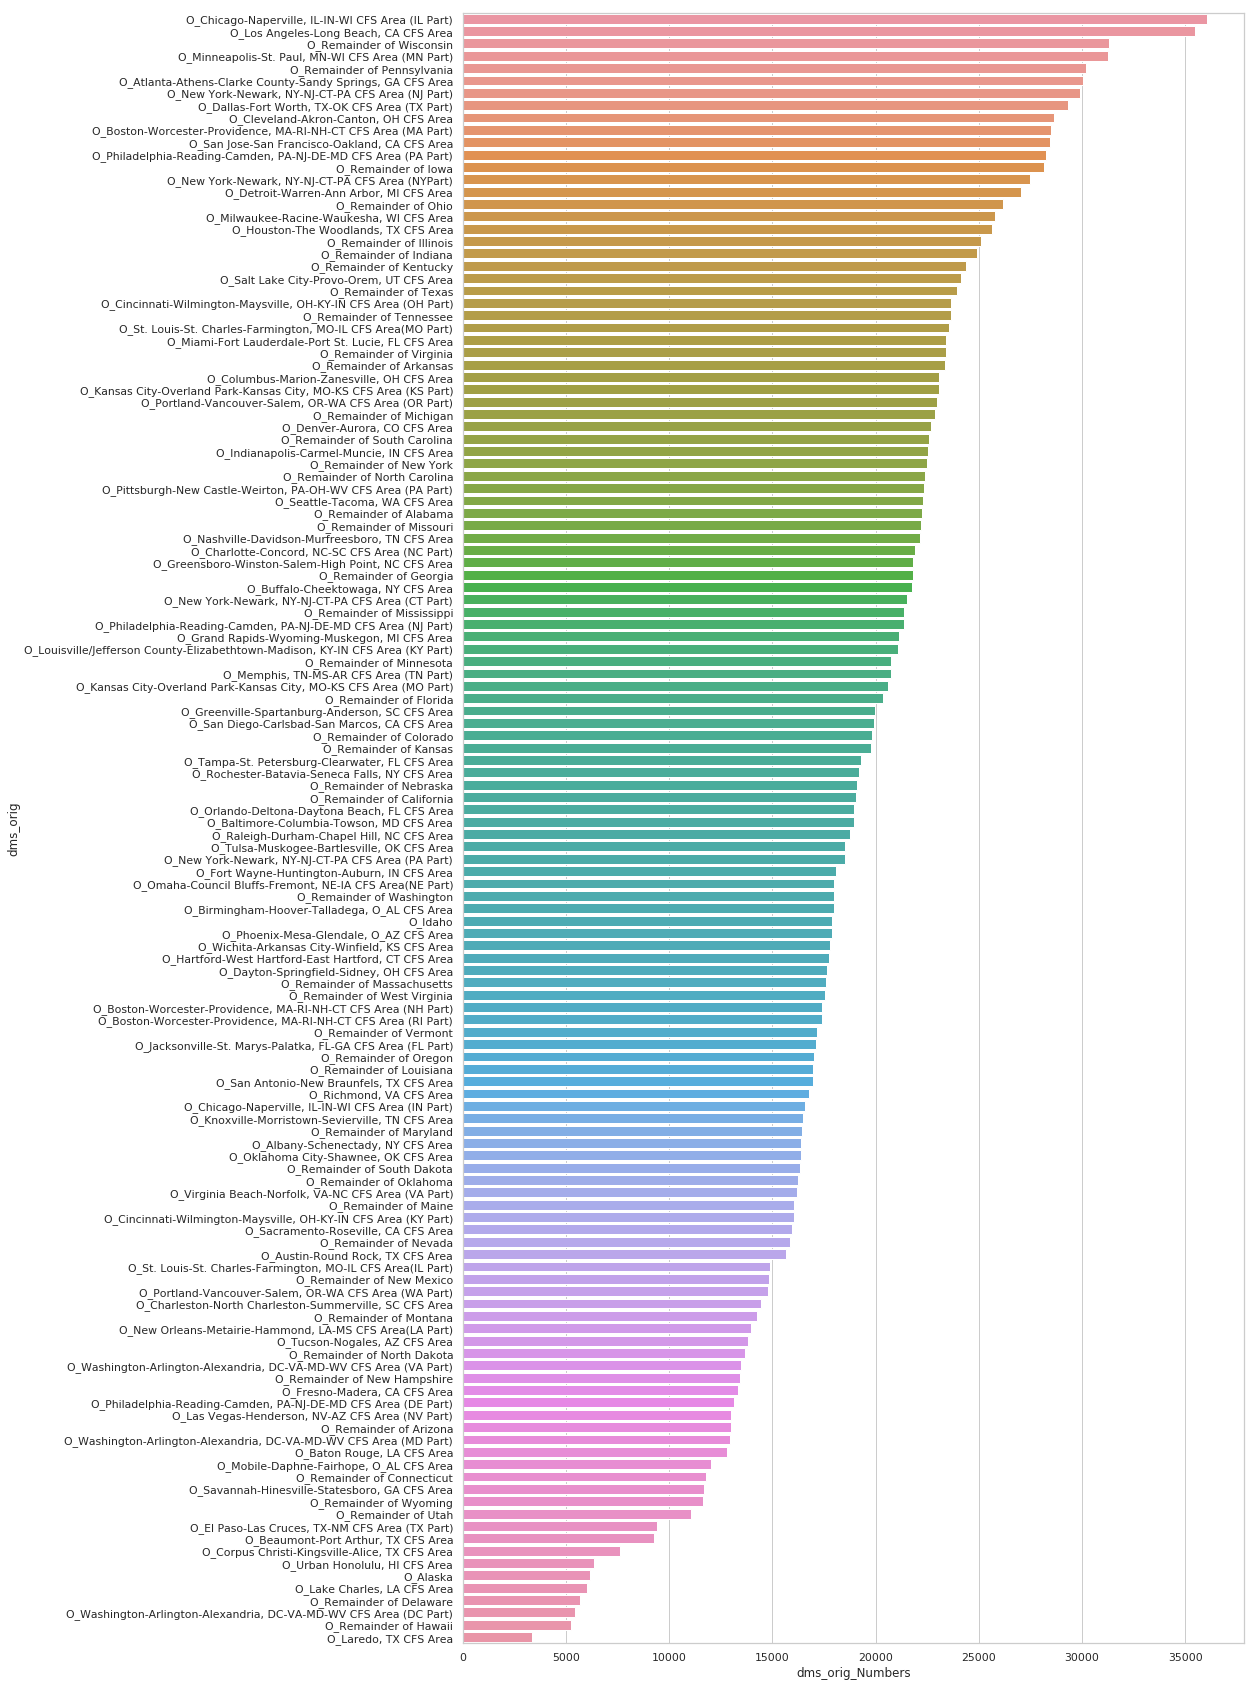

In [0]:
fig = plt.figure(figsize=(14,30))
sb.set(font_scale=0.99, style = "whitegrid")
sb.barplot(x= "dms_orig_Numbers", y = "dms_orig", data = df_tons_dms_orig_pd)
#plt.legend(loc='upper right')
display(fig)

In [0]:
#Grouping the Domestic region destination and count each of which and show it in descending order
dms_dest_count=df_tons.select('dms_dest').distinct().count()
print("Count for unique Domestic region destination : ",dms_dest_count)
print("-------------------------------------------------------------------------------")
df_tons_dms_dest=df_tons.groupBy("dms_dest").agg(count("*").alias("dms_dest_Numbers")).orderBy("dms_dest_Numbers",ascending=False)
df_tons_dms_dest.show(dms_dest_count,truncate = False)

Count for unique Domestic region destination : 132
-------------------------------------------------------------------------------
+---------------------------------------------------------------------------+----------------+
dms_dest |dms_dest_Numbers|
+---------------------------------------------------------------------------+----------------+
Los Angeles-Long Beach, CA CFS Area |35856 |
Chicago-Naperville, IL-IN-WI CFS Area (IL Part) |33030 |
Dallas-Fort Worth, TX-OK CFS Area (TX Part) |31662 |
Houston-The Woodlands, TX CFS Area |29784 |
Remainder of Pennsylvania |29772 |
San Jose-San Francisco-Oakland, CA CFS Area |29682 |
Atlanta-Athens-Clarke County-Sandy Springs, GA CFS Area |29496 |
Remainder of Texas |29298 |
New York-Newark, NY-NJ-CT-PA CFS Area (NYPart) |28734 |
New York-Newark, NY-NJ-CT-PA CFS Area (NJ Part) |28272 |
Boston-Worcester-Providence, MA-RI-NH-CT CFS Area (MA Part) |27042 |
Miami-Fort Lauderdale-Port St. Lucie, FL CFS Area |26748 |
Remainder of Florida |26322 |
Remainder of Wisconsin |26172 |
Minneapolis-St. Paul, MN-WI CFS Area (MN Part) |26106 |
Cleveland-Akron-Canton, OH CFS Area |25854 |
Philadelphia-Reading-Camden, PA-NJ-DE-MD CFS Area (PA Part) |25800 |
Seattle-Tacoma, WA CFS Area |25626 |
Detroit-Warren-Ann Arbor, MI CFS Area |25350 |
Remainder of Illinois |25206 |
Remainder of Iowa |25122 |
Denver-Aurora, CO CFS Area |25038 |
Phoenix-Mesa-Glendale, AZ CFS Area |24882 |
Remainder of North Carolina |24306 |
Remainder of Indiana |24132 |
Remainder of Ohio |23862 |
Remainder of California |23844 |
Remainder of Kentucky |23562 |
Remainder of Alabama |23334 |
Indianapolis-Carmel-Muncie, IN CFS Area |23310 |
Remainder of Arkansas |23148 |
Remainder of Michigan |23142 |
Pittsburgh-New Castle-Weirton, PA-OH-WV CFS Area (PA Part) |22926 |
Remainder of Virginia |22878 |
Remainder of Georgia |22674 |
Remainder of Tennessee |22524 |
Baltimore-Columbia-Towson, MD CFS Area |22512 |
Remainder of New York |22506 |
Remainder of Mississippi |22362 |
Columbus-Marion-Zanesville, OH CFS Area |22314 |
Portland-Vancouver-Salem, OR-WA CFS Area (OR Part) |22302 |
St. Louis-St. Charles-Farmington, MO-IL CFS Area(MO Part) |22290 |
Salt Lake City-Provo-Orem, UT CFS Area |22218 |
Remainder of Missouri |21864 |
Remainder of South Carolina |21750 |
Charlotte-Concord, NC-SC CFS Area (NC Part) |21708 |
Milwaukee-Racine-Waukesha, WI CFS Area |21276 |
San Diego-Carlsbad-San Marcos, CA CFS Area |21138 |
Tampa-St. Petersburg-Clearwater, FL CFS Area |20958 |
Orlando-Deltona-Daytona Beach, FL CFS Area |20958 |
Cincinnati-Wilmington-Maysville, OH-KY-IN CFS Area (OH Part) |20832 |
Nashville-Davidson-Murfreesboro, TN CFS Area |20706 |
Philadelphia-Reading-Camden, PA-NJ-DE-MD CFS Area (NJ Part) |19956 |
Remainder of Louisiana |19890 |
San Antonio-New Braunfels, TX CFS Area |19878 |
Remainder of Colorado |19800 |
Washington-Arlington-Alexandria, DC-VA-MD-WV CFS Area (VA Part) |19776 |
Raleigh-Durham-Chapel Hill, NC CFS Area |19626 |
New York-Newark, NY-NJ-CT-PA CFS Area (CT Part) |19278 |
Greensboro-Winston-Salem-High Point, NC CFS Area |18924 |
Washington-Arlington-Alexandria, DC-VA-MD-WV CFS Area (MD Part) |18828 |
Kansas City-Overland Park-Kansas City, MO-KS CFS Area (MO Part) |18660 |
Remainder of Washington |18654 |
Remainder of Minnesota |18618 |
Remainder of New Mexico |18540 |
New Orleans-Metairie-Hammond, LA-MS CFS Area(LA Part) |18438 |
Grand Rapids-Wyoming-Muskegon, MI CFS Area |18420 |
Jacksonville-St. Marys-Palatka, FL-GA CFS Area (FL Part) |18408 |
Louisville/Jefferson County-Elizabethtown-Madison, KY-IN CFS Area (KY Part)|18390 |
Remainder of West Virginia |18312 |
Sacramento-Roseville, CA CFS Area |18282 |
Greenville-Spartanburg-Anderson, SC CFS Area |18222 |
Birmingham-Hoover-Talladega, AL CFS Area |18210 |
Richmond, VA CFS Area |18132 |
Virginia Beach-Norfolk, VA-NC CFS Area (VA Part) |18066 |
Remainder of Kansas |18024 |
Kansas City-Overland Park-Kansas City, MO-KS CFS Area (KS Part) |17910 |
Oklahoma City-Shawnee, OK CF

In [0]:
df_tons_dms_dest_pd = df_tons_dms_dest.toPandas()

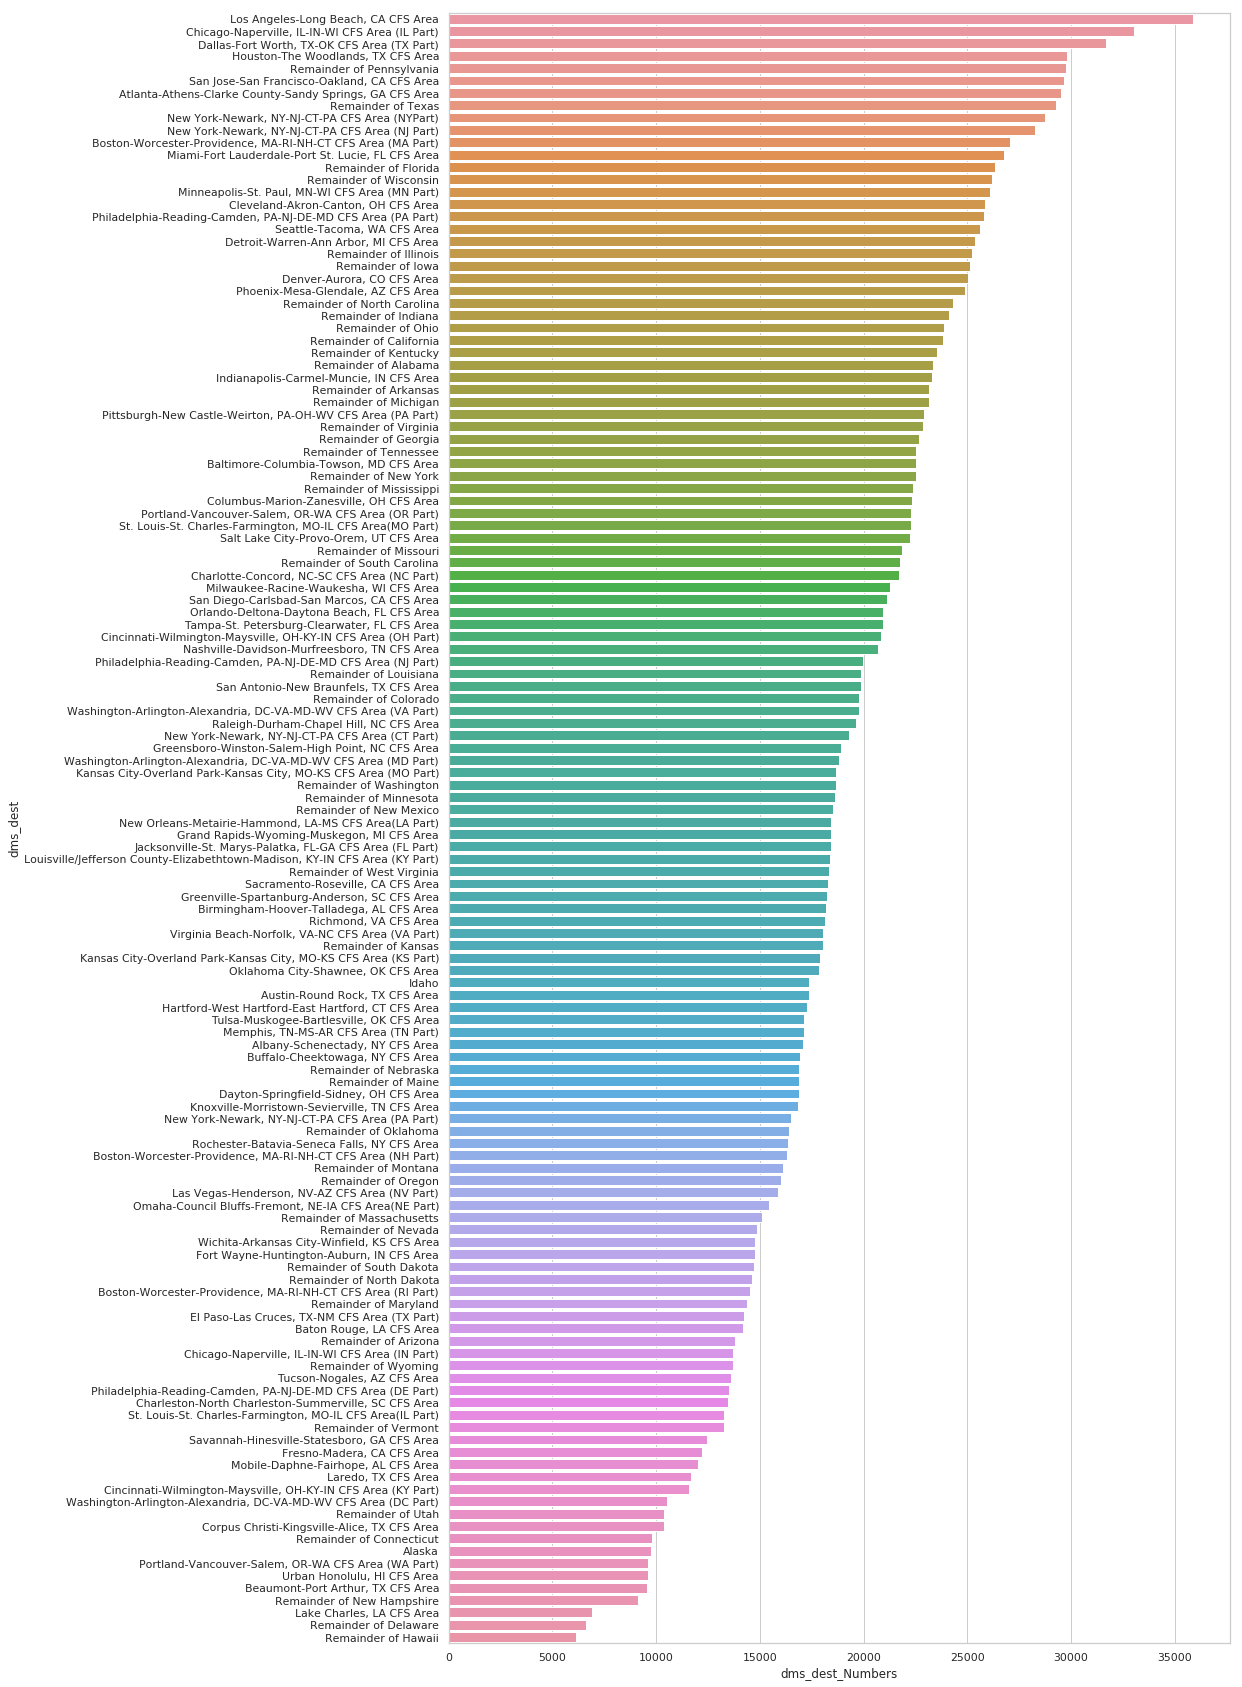

In [0]:
fig = plt.figure(figsize=(14,30))
sb.set(font_scale=0.99, style = "whitegrid")
sb.barplot(x= "dms_dest_Numbers", y = "dms_dest", data = df_tons_dms_dest_pd)
#plt.legend(loc='upper right')
display(fig)

In [0]:
#Grouping the Commodities and count each of which and show it in descending order
Commodities_count=df_tons.select('sctg2').distinct().count()
print("Count for unique Commodities : ",Commodities_count)
print("-------------------------------------------------------------------------------")
df_tons_Commodities=df_tons.groupBy("sctg2").agg(count("*").alias("Commodities_Numbers")).orderBy("Commodities_Numbers",ascending=False)
df_tons_Commodities.show(Commodities_count,truncate = False)

Count for unique Commodities : 43
-------------------------------------------------------------------------------
+--------------------------------------------------------------------------------------------+-------------------+
sctg2 |Commodities_Numbers|
+--------------------------------------------------------------------------------------------+-------------------+
Electronic and Other Electrical Equipment and Components, and Office Equipment |191190 |
Miscellaneous Manufactured Products |189510 |
Motorized and Other Vehicles (includes parts) |152868 |
Mixed Freight |146910 |
Machinery |140010 |
Plastics and Rubber |134424 |
Textiles, Leather, and Articles of Textiles or Leather |131802 |
Furniture, Mattresses and Mattress Supports, Lamps, Lighting Fittings, and Illuminated Signs|125004 |
Articles of Base Metal |123924 |
Printed Products |115398 |
Precision Instruments and Apparatus |109830 |
Other Chemical Products and Preparations |96378 |
Base Metal in Primary or Semi-Finished Forms and in Finished Basic Shapes |79422 |
Pharmaceutical Products |70440 |
Other Prepared Foodstuffs, Fats and Oils |69846 |
Non-Metallic Mineral Products |68220 |
Basic Chemicals |65346 |
Wood Products |59010 |
Paper or Paperboard Articles |56436 |
Pulp, Newsprint, Paper, and Paperboard |43104 |
Transportation Equipment, not elsewhere classified |41190 |
Other Coal and Petroleum Products, not elsewhere classified |34254 |
Milled Grain Products and Preparations, and Bakery Products |32346 |
Agricultural Products (excludes Animal Feed, Cereal Grains,Forage Products) |31836 |
Meat, Poultry, Fish, Seafood, and Their Preparations |29508 |
Animal Feed, Eggs, Honey, Other Products of Animal Origin |24372 |
Alcoholic Beverages and Denatured Alcohol |20892 |
Waste and Scrap (excludes of agriculture or food) |20208 |
Crude Petroleum |14982 |
Fertilizers |14730 |
Other Non-Metallic Minerals not elsewhere classified |14028 |
Tobacco Products |11340 |
Cereal Grains (includes seed) |9540 |
Animals and Fish (live) |8760 |
Gravel and Crushed Stone (excludes Dolomite and Slate) |7506 |
Natural Sands |7422 |
Gasoline, Aviation Turbine Fuel, and Ethanol (includes Kerosene, and Fuel Alcohols) |6528 |
Fuel Oils (includes Diesel, Bunker C, and Biodiesel) |5208 |
Metallic Ores and Concentrates |4470 |
Monumental or Building Stone |4278 |
Logs and Other Wood in the Rough |3894 |
Coal |2766 |
Commodity unknown |48 |
+--------------------------------------------------------------------------------------------+-------------------+

In [0]:
df_tons_Commodities_pd = df_tons_Commodities.toPandas()

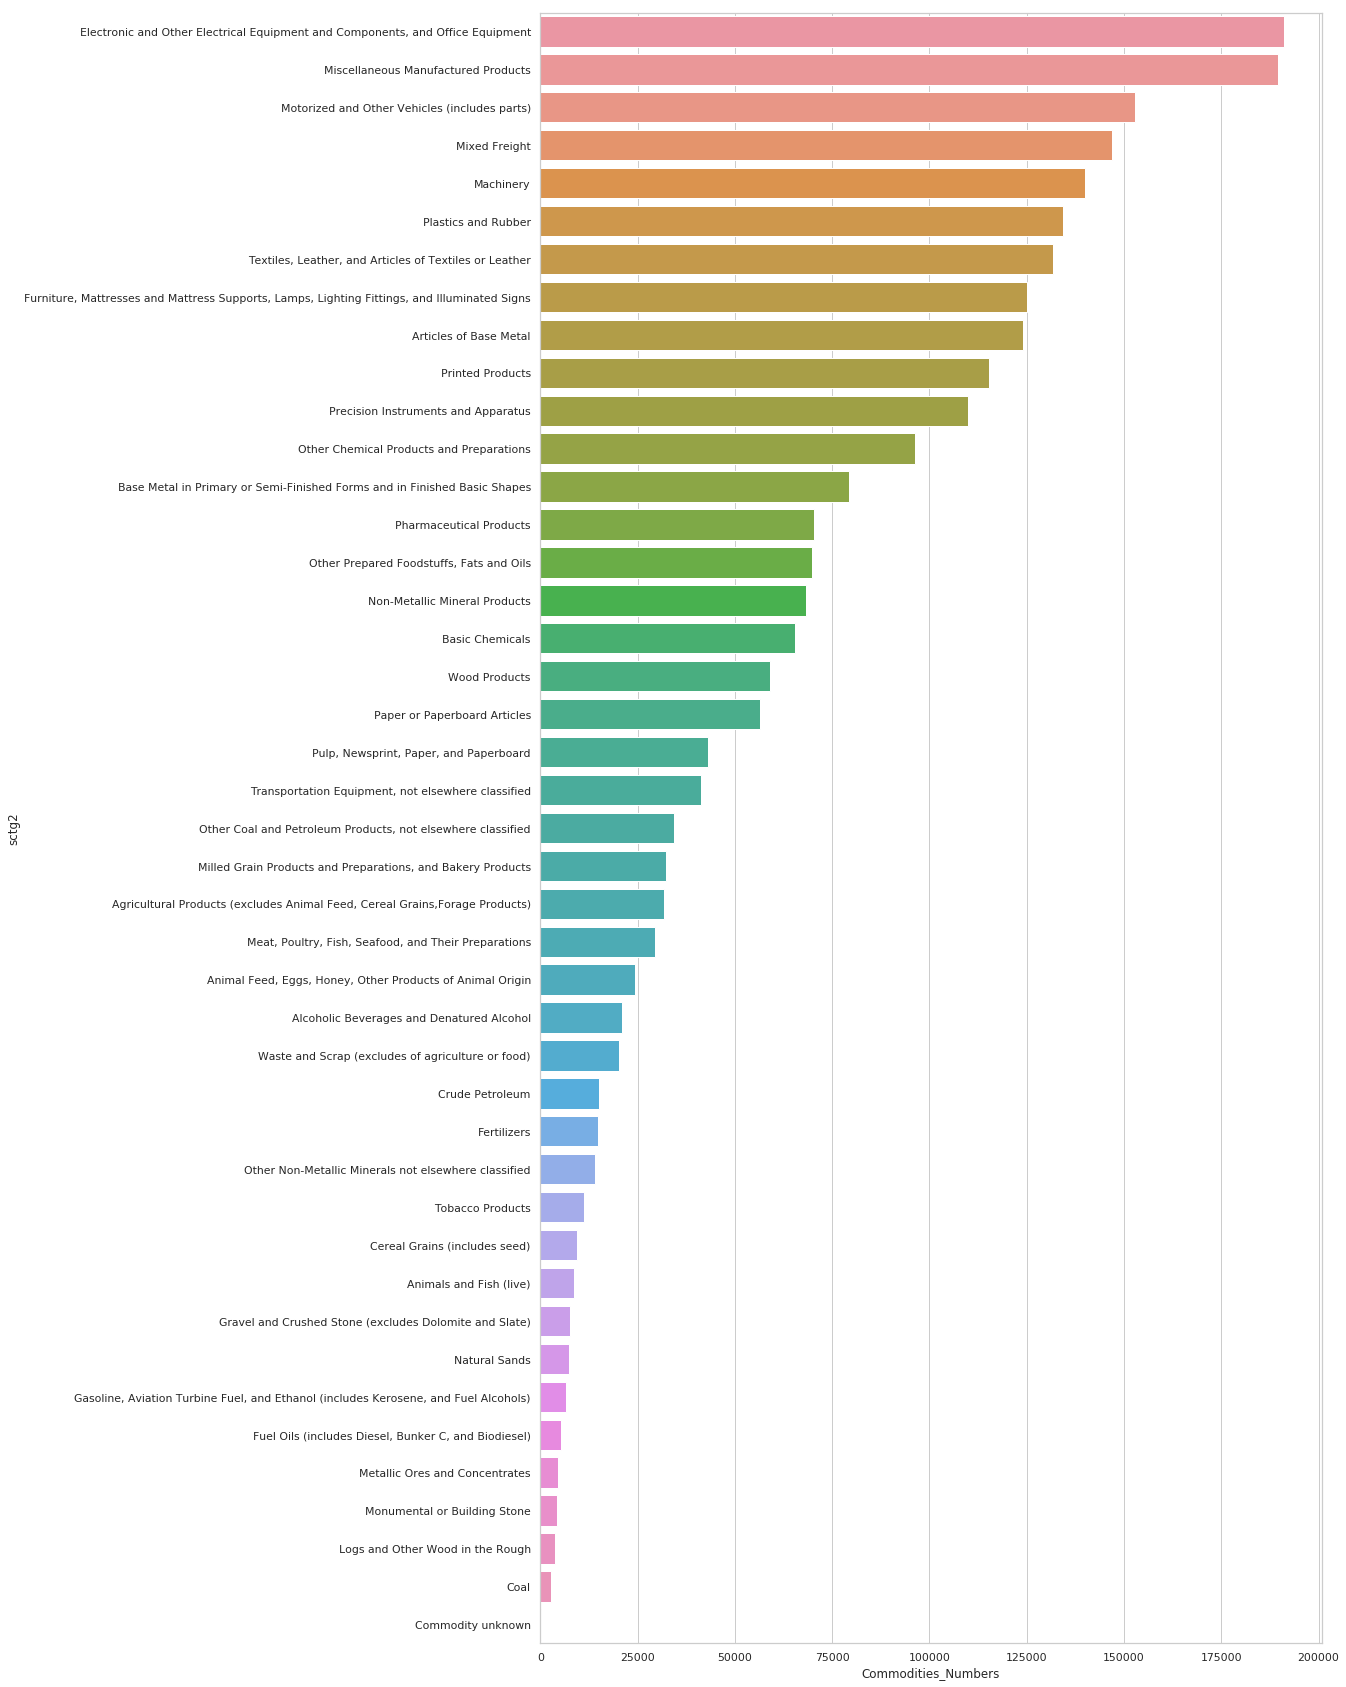

In [0]:
fig = plt.figure(figsize=(14,30))
sb.set(font_scale=0.99, style = "whitegrid")
sb.barplot(x= "Commodities_Numbers", y = "sctg2", data = df_tons_Commodities_pd)
#plt.legend(loc='upper right')
display(fig)

In [0]:
#Grouping the Modes of transportation and count each of which and show it in descending order
dms_mode_count=df_tons.select('dms_mode').distinct().count()
print("Count for unique Modes of transportation : ",dms_mode_count)
print("-------------------------------------------------------------------------------")
df_tons_dms_mode=df_tons.groupBy("dms_mode").agg(count("*").alias("dms_mode_Numbers")).orderBy("dms_mode_Numbers",ascending=False)
df_tons_dms_mode.show(dms_mode_count,truncate = False)

Count for unique Modes of transportation : 7
-------------------------------------------------------------------------------
+------------------------+----------------+
dms_mode |dms_mode_Numbers|
+------------------------+----------------+
Truck |1365390 |
Multiple Modes and Mail |979824 |
Air (includes truck-air)|99996 |
Rail |52212 |
Pipeline |14586 |
Water |7146 |
Other and Unknown |24 |
+------------------------+----------------+

In [0]:
df_tons_dms_mode_pd = df_tons_dms_mode.toPandas()

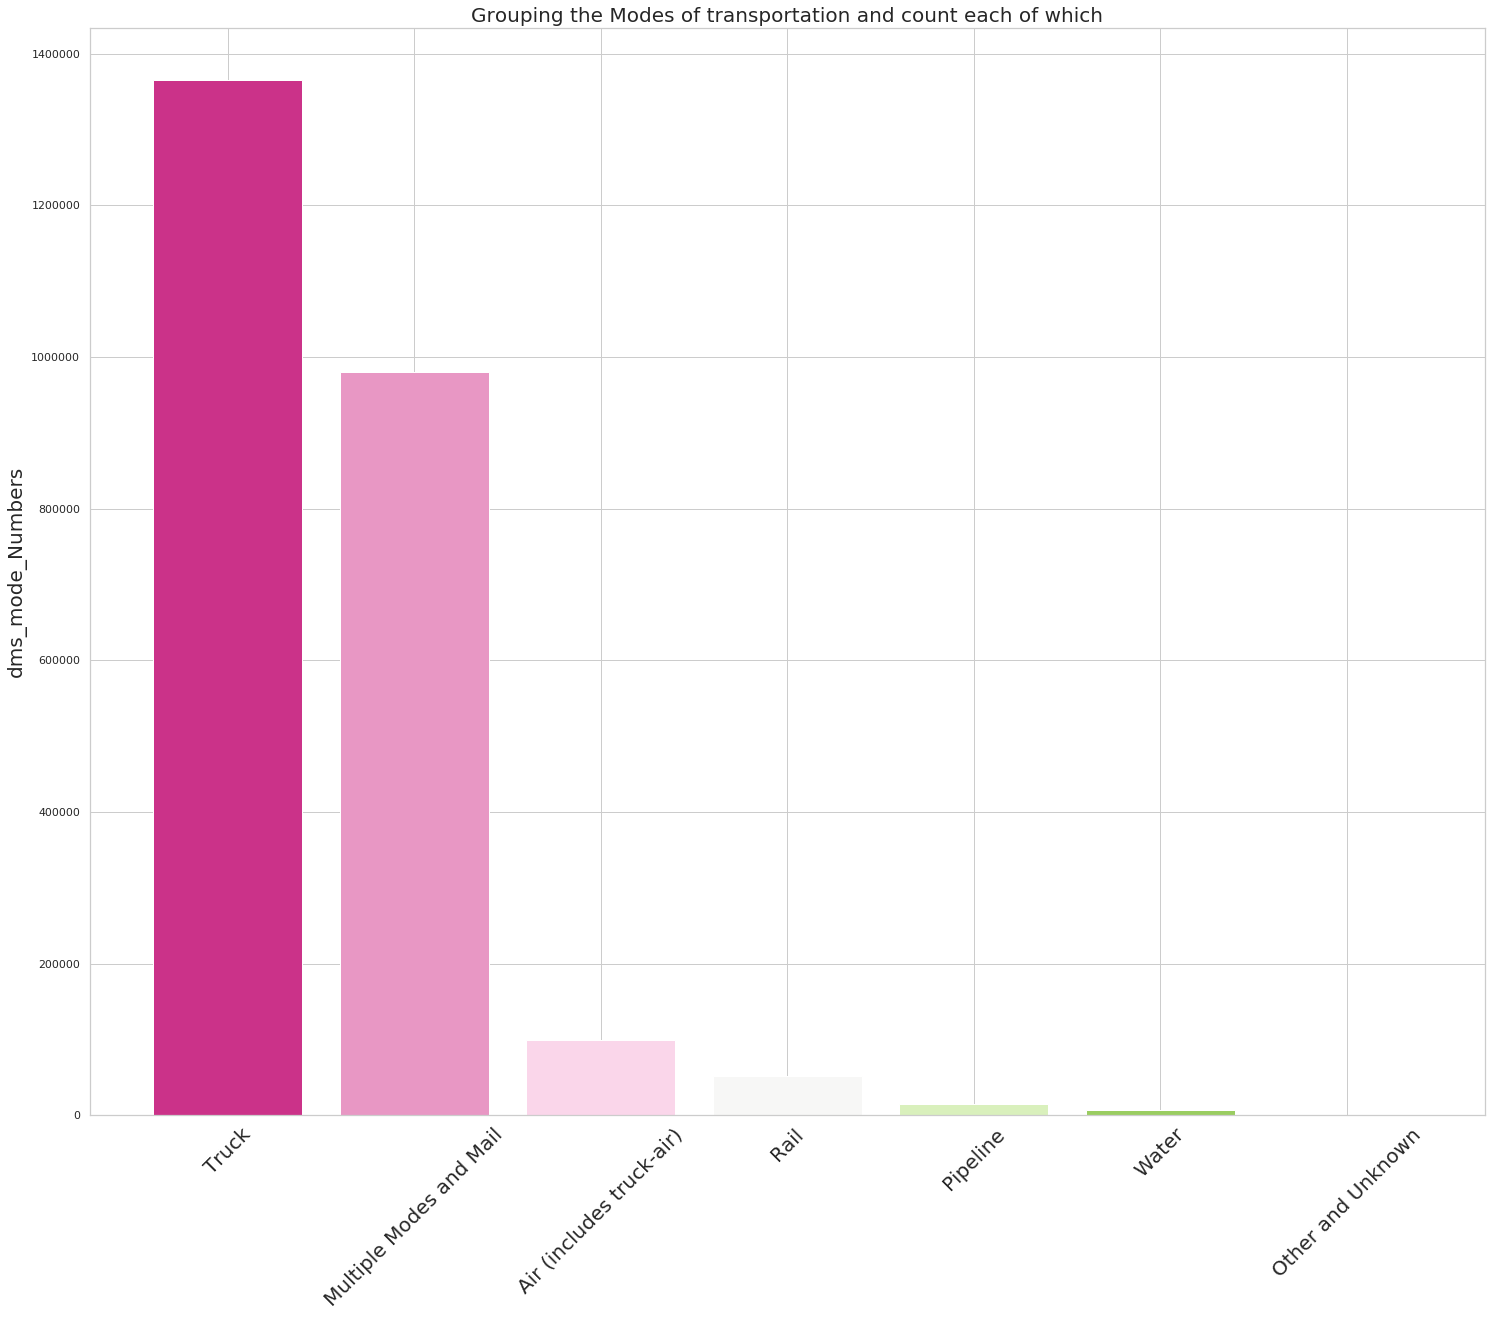

In [0]:
sb.set(style = "whitegrid")
fig = plt.figure(figsize=(25,20))
x = np.arange(len(df_tons_dms_mode_pd["dms_mode"]))
plt.bar(x, df_tons_dms_mode_pd["dms_mode_Numbers"], color = sb.color_palette("PiYG", len(x)), data = df_tons_dms_mode_pd)
plt.ylabel("dms_mode_Numbers", fontsize=20)
plt.xticks(x, tuple(df_tons_dms_mode_pd["dms_mode"]), fontsize = 20, rotation = 45)
plt.title('Grouping the Modes of transportation and count each of which', fontsize=20)
display(fig)

In [0]:

            Commodities_Numbers_df=df_tons.groupBy(col("sctg2").alias("Commodities"),col("year").alias("Year")).agg(count("*").alias("Commodities_Numbers")).orderBy("Year","Commodities").select("Year","Commodities","Commodities_Numbers")

#df.groupBy("Category").count().orderBy("Category")

Commodities_Numbers_df.show()

+----+--------------------+-------------------+
Year| Commodities|Commodities_Numbers|
+----+--------------------+-------------------+
2013|Agricultural Prod...| 5306|
2013|Alcoholic Beverag...| 3482|
2013|Animal Feed, Eggs...| 4062|
2013|Animals and Fish ...| 1460|
2013|Articles of Base ...| 20654|
2013|Base Metal in Pri...| 13237|
2013| Basic Chemicals| 10891|
2013|Cereal Grains (in...| 1590|
2013| Coal| 461|
2013| Commodity unknown| 8|
2013| Crude Petroleum| 2497|
2013|Electronic and Ot...| 31865|
2013| Fertilizers| 2455|
2013|Fuel Oils (includ...| 868|
2013|Furniture, Mattre...| 20834|
2013|Gasoline, Aviatio...| 1088|
2013|Gravel and Crushe...| 1251|
2013|Logs and Other Wo...| 649|
2013| Machinery| 23335|
2013|Meat, Poultry, Fi...| 4918|
+----+--------------------+-------------------+
only showing top 20 rows

In [0]:
from pyspark.sql.window import Window
df_tons_Commodities_percent  = df_tons_Commodities.withColumn('Commodities_Percent', F.col('Commodities_Numbers')*100/F.sum('Commodities_Numbers').over(Window.partitionBy()))
df_tons_Commodities_percent=df_tons_Commodities_percent.orderBy('Commodities_Percent', ascending=False).show()


+--------------------+-------------------+-------------------+
 sctg2|Commodities_Numbers|Commodities_Percent|
+--------------------+-------------------+-------------------+
Electronic and Ot...| 191190| 7.589380345493649|
Miscellaneous Man...| 189510| 7.522691925699573|
Motorized and Oth...| 152868| 6.068169855405215|
 Mixed Freight| 146910| 5.831664138064083|
 Machinery| 140010| 5.5577652710527|
 Plastics and Rubber| 134424| 5.336026275237399|
Textiles, Leather...| 131802| 5.231944705773073|
Furniture, Mattre...| 125004| 4.962094778534903|
Articles of Base ...| 123924| 4.919223651524426|
 Printed Products| 115398| 4.5807799210694915|
Precision Instrum...| 109830| 4.359755444037698|
Other Chemical Pr...| 96378| 3.8257717398294204|
Base Metal in Pri...| 79422| 3.152695045764928|
Pharmaceutical Pr...| 70440| 2.796150172794459|
Other Prepared Fo...| 69846| 2.7725710529386967|
Non-Metallic Mine...| 68220| 2.7080261894951447|
 Basic Chemicals| 65346| 2.5939413570617083|
 Wood Products| 59010| 2.3424307452669084|
Paper or Paperboa...| 56436| 2.240254559225271|
Pulp, Newsprint, ...| 43104| 1.7110343135737134|
+--------------------+-------------------+-------------------+
only showing top 20 rows

In [0]:
df_tons_Transportation_Mode_percent  = df_tons_dms_mode.withColumn('Transportation_Mode_Percent', F.col('dms_mode_Numbers')*100/F.sum('dms_mode_Numbers').over(Window.partitionBy()))
df_tons_Transportation_Mode_percent=df_tons_Transportation_Mode_percent.orderBy('Transportation_Mode_Percent', ascending=False).show()

+--------------------+----------------+---------------------------+
 dms_mode|dms_mode_Numbers|Transportation_Mode_Percent|
+--------------------+----------------+---------------------------+
 Truck| 1365390| 54.199822322995836|
Multiple Modes an...| 979824| 38.89459180732763|
Air (includes tru...| 99996| 3.969390015314519|
 Rail| 52212| 2.072580818028738|
 Pipeline| 14586| 0.5789983875692786|
 Water| 7146| 0.2836639570526577|
 Other and Unknown| 24| 9.526917113439384E-4|
+--------------------+----------------+---------------------------+

In [0]:
df_tons_dms_orig_percent  = df_tons_dms_orig.withColumn('Dms_orig_Percent', F.col('dms_orig_Numbers')*100/F.sum('dms_orig_Numbers').over(Window.partitionBy()))
df_tons_dms_orig_percent=df_tons_dms_orig_percent.orderBy('Dms_orig_Percent', ascending=False).show()

+--------------------+----------------+------------------+
 dms_orig|dms_orig_Numbers| Dms_orig_Percent|
+--------------------+----------------+------------------+
O_Chicago-Napervi...| 36036|1.4304666045829235|
O_Los Angeles-Lon...| 35472| 1.408078349366341|
O_Remainder of Wi...| 31320|1.2432626833038396|
O_Minneapolis-St....| 31278|1.2415954728089877|
O_Remainder of Pe...| 30180|1.1980098270150026|
O_Atlanta-Athens-...| 30048|1.1927700226026108|
O_New York-Newark...| 29910|1.1872920452623832|
O_Dallas-Fort Wor...| 29304|1.1632365795509487|
O_Cleveland-Akron...| 28626|1.1363230387054826|
O_Boston-Worceste...| 28506|1.1315595801487628|
O_San Jose-San Fr...| 28434| 1.128701505014731|
O_Philadelphia-Re...| 28242|1.1210799713239794|
 O_Remainder of Iowa| 28176|1.1184600691177837|
O_New York-Newark...| 27486|1.0910701824166453|
O_Detroit-Warren-...| 27042|1.0734453857567825|
 O_Remainder of Ohio| 26148|1.0379576195092208|
O_Milwaukee-Racin...| 25776| 1.02319089798339|
O_Houston-The Woo...| 25614|1.0167602289318183|
O_Remainder of Il...| 25122|0.9972300488492675|
O_Remainder of In...| 24924| 0.98937034223068|
+--------------------+----------------+------------------+
only showing top 20 rows

In [0]:
df_tons_dms_dest_percent  = df_tons_dms_dest.withColumn('Dms_dest_Percent', F.col('dms_dest_Numbers')*100/F.sum('dms_dest_Numbers').over(Window.partitionBy()))
df_tons_dms_dest_percent=df_tons_dms_dest_percent.orderBy('Dms_dest_Percent', ascending=False).show()

+--------------------+----------------+------------------+
 dms_dest|dms_dest_Numbers| Dms_dest_Percent|
+--------------------+----------------+------------------+
Los Angeles-Long ...| 35856|1.4233214167478438|
Chicago-Napervill...| 33030|1.3111419677370952|
Dallas-Fort Worth...| 31662|1.2568385401904907|
Houston-The Woodl...| 29784|1.1822904137778276|
Remainder of Penn...| 29772|1.1818140679221556|
San Jose-San Fran...| 29682|1.1782414740046159|
Atlanta-Athens-Cl...| 29496|1.1708581132417002|
 Remainder of Texas| 29298|1.1629984066231127|
New York-Newark, ...| 28734|1.1406101514065303|
New York-Newark, ...| 28272|1.1222708359631595|
Boston-Worcester-...| 27042|1.0734453857567825|
Miami-Fort Lauder...| 26748|1.0617749122928193|
Remainder of Florida| 26322|1.0448646344164645|
Remainder of Wisc...| 26172|1.0389103112205649|
Minneapolis-St. P...| 26106| 1.036290409014369|
Cleveland-Akron-C...| 25854|1.0262871460452576|
Philadelphia-Read...| 25800|1.0241435896947337|
Seattle-Tacoma, W...| 25626|1.0172365747874903|
Detroit-Warren-An...| 25350| 1.006280620107035|
Remainder of Illi...| 25206|1.0005644698389713|
+--------------------+----------------+------------------+
only showing top 20 rows